In [52]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense,Activation, Dropout
from keras.optimizers import SGD, Nadam

In [53]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [54]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

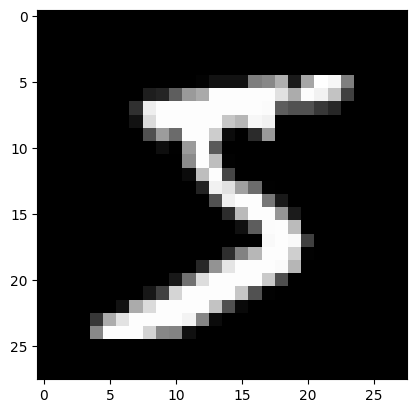

In [55]:
y_train_conv = to_categorical(y_train)
y_test_conv  = to_categorical(y_test)

plt.imshow(x_train[0],cmap='gray')

In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
x_train_reshape = x_train.reshape((60000,784)) # Faz a matriz virar um vetor
x_test_reshape  = x_test.reshape((10000,784))  # Faz a matriz virar um vetor

In [58]:
x_train_normalize = x_train_reshape.astype('float32')/255
x_test_normalize  = x_test_reshape.astype('float32')/255

In [59]:

model = Sequential()
model.add(Dense(30, input_dim=784, kernel_initializer='normal', activation='relu', kernel_regularizer=keras.regularizers.l1(0.01)))
model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

In [64]:
model.train = model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['acc'])
history = model.fit(x_train_normalize, y_train_conv, epochs=10, batch_size=10, verbose=2, validation_data=(x_test_normalize, y_test_conv))

Epoch 1/10
6000/6000 - 17s - loss: 1.7769 - acc: 0.3443 - val_loss: 1.5306 - val_acc: 0.4480 - 17s/epoch - 3ms/step
Epoch 2/10
6000/6000 - 15s - loss: 1.5199 - acc: 0.4785 - val_loss: 1.3710 - val_acc: 0.5474 - 15s/epoch - 2ms/step
Epoch 3/10
6000/6000 - 15s - loss: 1.4440 - acc: 0.5383 - val_loss: 1.2489 - val_acc: 0.6553 - 15s/epoch - 2ms/step
Epoch 4/10
6000/6000 - 15s - loss: 1.2694 - acc: 0.6577 - val_loss: 1.0852 - val_acc: 0.7370 - 15s/epoch - 3ms/step
Epoch 5/10
6000/6000 - 15s - loss: 1.1734 - acc: 0.7007 - val_loss: 1.0384 - val_acc: 0.7506 - 15s/epoch - 3ms/step
Epoch 6/10
6000/6000 - 15s - loss: 1.1481 - acc: 0.7105 - val_loss: 1.2521 - val_acc: 0.6479 - 15s/epoch - 3ms/step
Epoch 7/10
6000/6000 - 15s - loss: 1.1337 - acc: 0.7162 - val_loss: 1.0487 - val_acc: 0.7476 - 15s/epoch - 3ms/step
Epoch 8/10
6000/6000 - 15s - loss: 1.1283 - acc: 0.7198 - val_loss: 1.0807 - val_acc: 0.7418 - 15s/epoch - 3ms/step
Epoch 9/10
6000/6000 - 14s - loss: 1.0893 - acc: 0.7461 - val_loss: 0.90

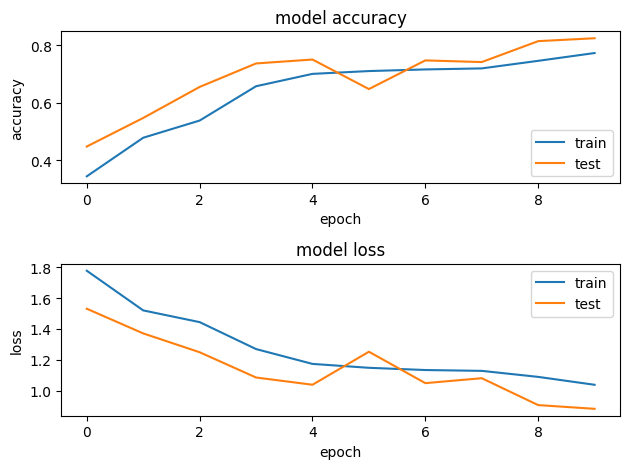

In [65]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()